<a href="https://colab.research.google.com/github/bwada10/MAT421---Computational-Methods/blob/main/ModuleB_Interpolation2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Chapter 17 - Interpolation**

**17.4: Lagrange Polynomial Interpolation**

**Lagrange Polynomial Interpolation** finds a single or a unique polynomial of lowest degree that passes through every data point.

---

> *Find the Lagrange polynomial for the data set x = [1,2,3] and y = [2,4,3].*


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

plt.style.use('seaborn-poster')

In [7]:
x = [1,2,3] #X-Data set
y = [2,4,3] #Y-Data Set

x_new = np.arange(-1, 5, 0.1) #Interval defined array 

function = lagrange(x,y)  #Built-in Lagrange Function

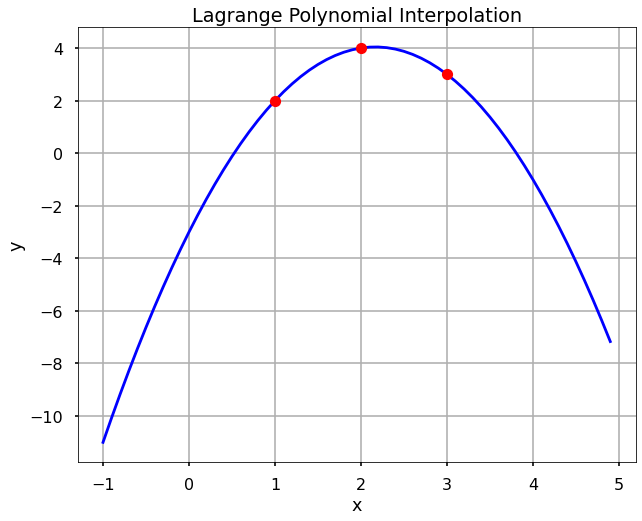

In [8]:
figure = plt.figure(figsize = (10,8)) #Plot the figure
plt.plot(x_new, function(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial Interpolation')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**17.5: Newton's Polynomial Interpolation**

**Newton's Polynomial Interpolation** is a another popular way to fit exactly for a set of data points. The general form of an **n - 1** order Newton's Polynomial that goes through **n** points is:

***f(x)* = ∑*a_i* * *n_i(x)*, where *n_i(x)* = ∏(*x* - *x_j*)**

One special thing about Newton's polynomial is that the coefficients *a_i* can be easily determined by simple mathematical procedures.


---



> *Find and calculate the divided differences table for x = [-7, 1, -2, 4] and y = [0, 8, -1, 5].*



In [22]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

%matplotlib inline

In [23]:
def divided_diff(x, y):
    '''
    function to calculate the divided
    differences table
    '''
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
            
    return coef

def newton_poly(coef, x_data, x):
    '''
    evaluate the newton polynomial 
    at x
    '''
    n = len(x_data) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

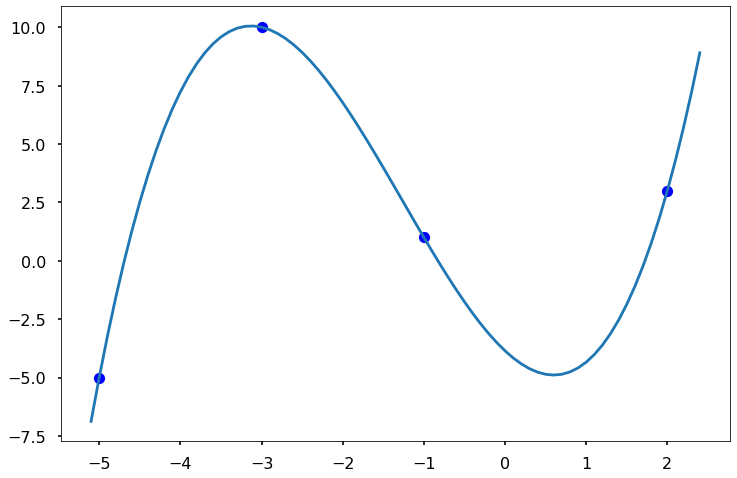

In [45]:
x = np.array([-5, -3, -1, 2])
y = np.array([-5, 10, 1, 3])
# get the divided difference coef
a_s = divided_diff(x, y)[0, :]

# evaluate on new data points
x_new = np.arange(-5.1, 2.5, .1)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (12, 8))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)